# NAME - GAURAV MAHESHWARI (INTERN AT THE SPARKS FOUNDATION)

### THE SPARKS FOUNDATION GRIP (Graduate Rotational Internship Program) June 2021 BATCH
## DATA SCIENCE AND BUSINESS ANALYTICS
### TASK 4:- Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_terror=pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin1')

In [3]:
# check first 5 rows of the dataset
df_terror.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
# check last 5 rows of the dataset
df_terror.tail()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN
181690,201712310032,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Security tightened in Cotabato following IED ...","""Security tightened in Cotabato City,"" Manila ...",NaN,START Primary Collection,-9,-9,0,-9,NaN


# EDA of Dataset

In [5]:
# check the all columns of dataset
df_terror.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
# information of dataset
df_terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [7]:
# Rename the Columns for better understanding
df_terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)

In [8]:
df_terror=df_terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [9]:
 # To Check first 5 rows of Dataset after renaming
df_terror.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [10]:
# shape of dataset
df_terror.shape

(181691, 17)

In [11]:
# check the datatype of each attributes
df_terror.dtypes

Year             int64
Month            int64
Day              int64
Country         object
Region          object
city            object
latitude       float64
longitude      float64
AttackType      object
Killed         float64
Wounded        float64
Target          object
Summary         object
Group           object
Target_type     object
Weapon_type     object
Motive          object
dtype: object

In [12]:
# Checking the presence of Missing values in dataset
df_terror.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
dtype: int64

In [13]:
# statistical details of dataset
df_terror.describe(include="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Year,181691,NaN,NaN,NaN,2002.64,13.2594,1970,1991,2009,2014,2017
Month,181691,NaN,NaN,NaN,6.46728,3.3883,0,4,6,9,12
Day,181691,NaN,NaN,NaN,15.5056,8.81404,0,8,15,23,31
Country,181691,205,Iraq,24636,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,181691,12,Middle East & North Africa,50474,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,181257,36674,Unknown,9775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,177135,NaN,NaN,NaN,23.4983,18.5692,-53.1546,11.51,31.4675,34.6851,74.6336
longitude,177134,NaN,NaN,NaN,-458.696,204779,-8.61859e+07,4.54564,43.2465,68.7103,179.367
AttackType,181691,9,Bombing/Explosion,88255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Killed,171378,NaN,NaN,NaN,2.40327,11.5457,0,0,0,2,1570


# Visualization of Dataset

In [14]:
# correlation between the attributes
df_terror.corr()

,Year,Month,Day,latitude,longitude,Killed,Wounded
Year,1.000000,0.000139,0.018254,0.166933,0.003917,0.015341,0.015273
Month,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.003463,0.002938
Day,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.003693,-0.001268
latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.018124,0.015988
longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000562,0.000223
Killed,0.015341,0.003463,-0.003693,-0.018124,-0.000562,1.000000,0.534375
Wounded,0.015273,0.002938,-0.001268,0.015988,0.000223,0.534375,1.000000


<AxesSubplot:>

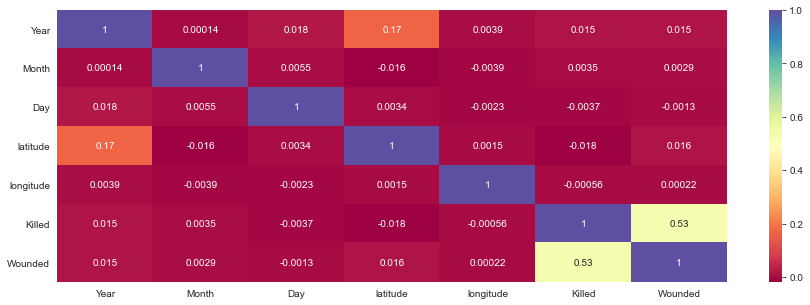

In [15]:
plt.figure(figsize=(15,5))
sns.heatmap(df_terror.corr(),cmap="Spectral",annot=True)

Text(0.5, 1.0, 'Number Of Terrorist Activities Each Year')

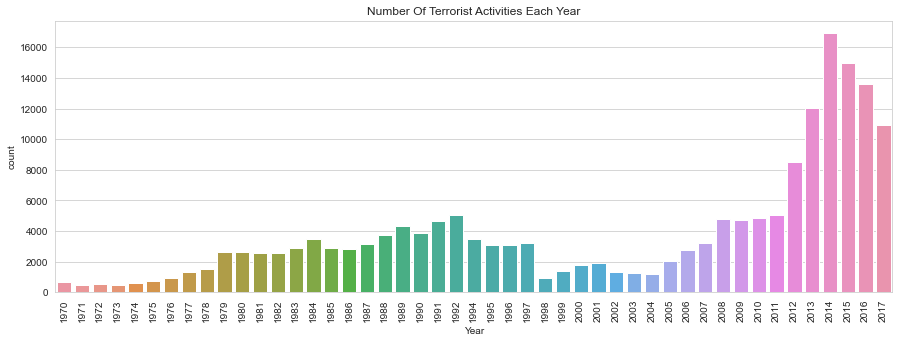

In [16]:
# Visualizing the Number Of Terrorist Activities Each Year
plt.subplots(figsize=(15,5))
sns.countplot('Year',data=df_terror)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')

Text(0.5, 1.0, 'Attacking Methods by Terrorists')

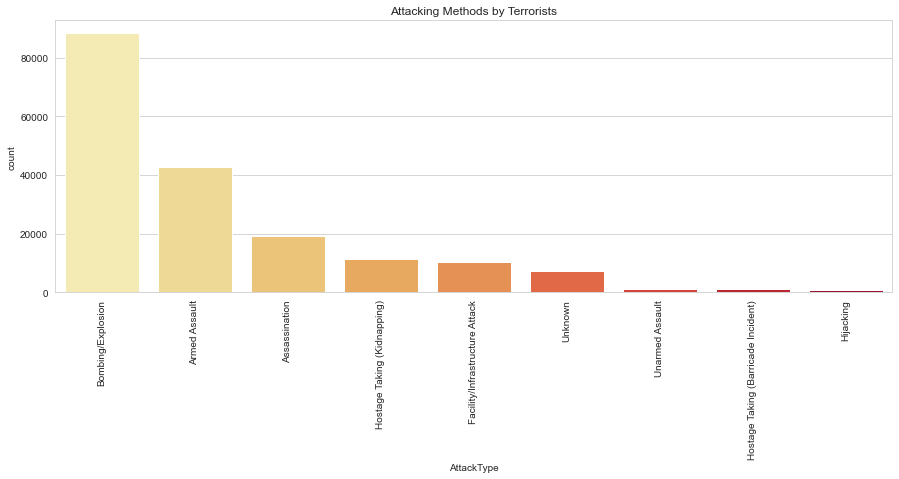

In [17]:
# Visualization to check the Attacking Methods by Terrorists
plt.subplots(figsize=(15,5))
sns.countplot('AttackType',data=df_terror,palette='YlOrRd',order=df_terror['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')

Text(0.5, 1.0, 'Targets of Terrorists')

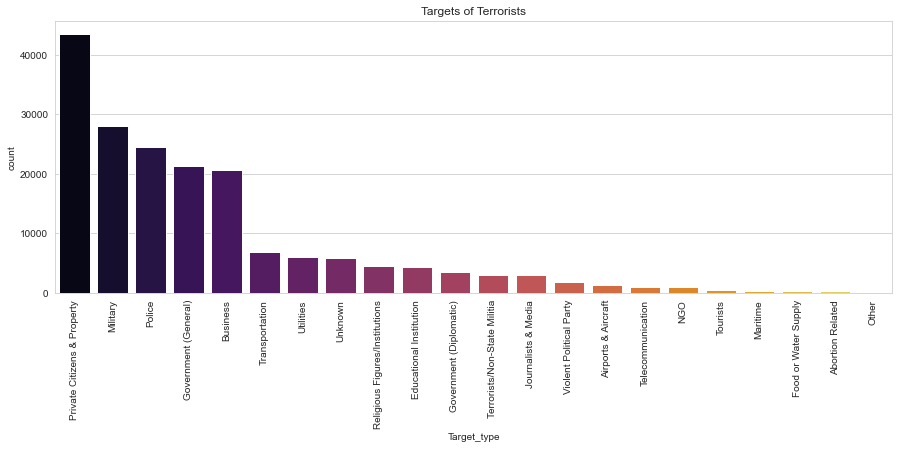

In [18]:
# Visualiztion to see Targets of Terrorists
plt.subplots(figsize=(15,5))
sns.countplot(df_terror['Target_type'],palette='inferno',order=df_terror['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Targets of Terrorists')

Text(0.5, 1.0, 'Number Of Terrorist Attacks Per Region')

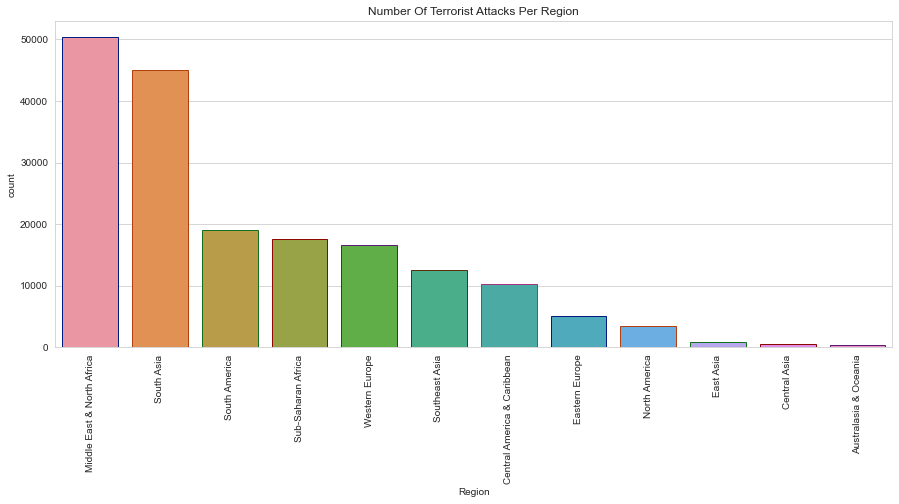

In [19]:
# Number Of Terrorist Attacks Per Region 
plt.subplots(figsize=(15,6))
sns.countplot('Region',data=df_terror,edgecolor=sns.color_palette('dark',7),order=df_terror['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Attacks Per Region')

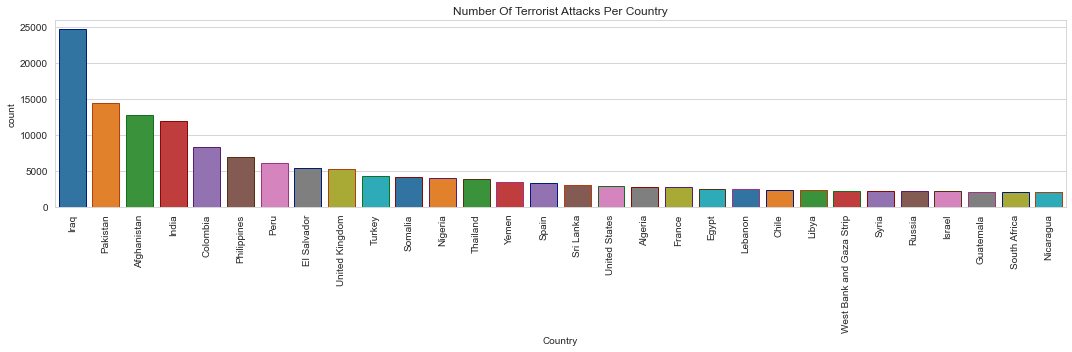

In [20]:
# Number Of Terrorist Attacks Per Country 
plt.subplots(figsize=(15,5))
sns.countplot('Country',data=df_terror,palette="tab10",edgecolor=sns.color_palette('dark',7),order=df_terror['Country'].value_counts()[:30].index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Attacks Per Country')
plt.tight_layout()

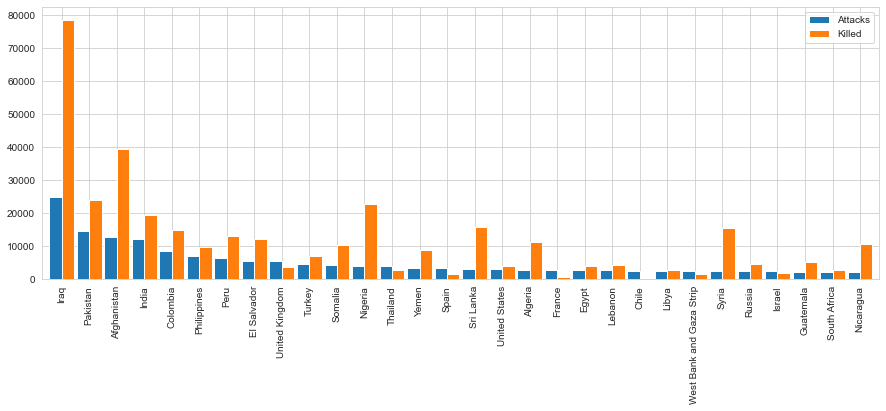

In [21]:
# Counts of Attacks vs Killed
count_terror=df_terror['Country'].value_counts()[:30].to_frame()
count_terror.columns=['Attacks']
count_kill=df_terror.groupby('Country')['Killed'].sum().to_frame()
count_terror.merge(count_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(15,5)

Text(0.5, 1.0, 'Terrorist Groups with Highest Terror Attacks')

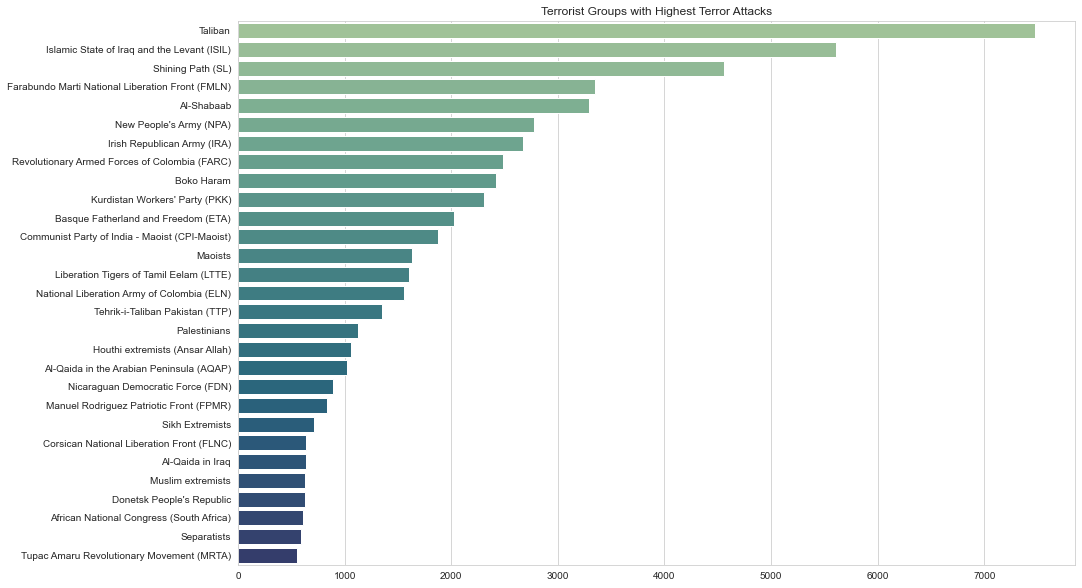

In [22]:
# Terrorist Groups with Highest Terror Attacks
plt.subplots(figsize=(15,10))
sns.barplot(y=df_terror['Group'].value_counts()[1:30].index,x=df_terror['Group'].value_counts()[1:30].values,
           palette="crest")
plt.title('Terrorist Groups with Highest Terror Attacks')